# Sci-kit Learn Housing Regression

The next exploratory data analysis that will be completed focuses on the regression of house prices from Kaggle's datasets. Utilizing linear regression and decision trees, accuracy scores of two machine learning models will be compared for efficacy.

## Load the Data

Before regression can be completed on this dataset, a `Pandas` dataframe needs to be uploaded from the Kaggle csv file. Additionally, the data needs to be cleaned too.

In [95]:
import pandas as pd

housing_df = pd.read_csv("house_data.csv", index_col="Id")
print(housing_df.head(5))

    MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
Id                                                                    
1           60       RL         65.0     8450   Pave   NaN      Reg   
2           20       RL         80.0     9600   Pave   NaN      Reg   
3           60       RL         68.0    11250   Pave   NaN      IR1   
4           70       RL         60.0     9550   Pave   NaN      IR1   
5           60       RL         84.0    14260   Pave   NaN      IR1   

   LandContour Utilities LotConfig  ... PoolArea PoolQC Fence MiscFeature  \
Id                                  ...                                     
1          Lvl    AllPub    Inside  ...        0    NaN   NaN         NaN   
2          Lvl    AllPub       FR2  ...        0    NaN   NaN         NaN   
3          Lvl    AllPub    Inside  ...        0    NaN   NaN         NaN   
4          Lvl    AllPub    Corner  ...        0    NaN   NaN         NaN   
5          Lvl    AllPub       FR2  ... 

## Clean the Data

In order for this dataset to be properly prepared and cleaned, two parameters will be taken into account:

* Rows with missing values will be dropped
* Columns with at least 25% data missing will be dropped

The code below takes care of these issues within `housing_df`:

In [96]:
print("Initial Instances:", len(housing_df.index))
print("Initial Attributes: 80")

for i in housing_df.columns:
    temp_ser = housing_df[i]
    missing_value_count = temp_ser.isna().sum()
    missing_pct = missing_value_count / len(temp_ser)

    if missing_pct >= 0.25:
        housing_df = housing_df.drop([i], axis=1)

housing_df = housing_df.dropna()

print(housing_df.head(5))
print("Number of Instances:", len(housing_df.index))

Initial Instances: 1460
Initial Attributes: 80
    MSSubClass MSZoning  LotFrontage  LotArea Street LotShape LandContour  \
Id                                                                          
1           60       RL         65.0     8450   Pave      Reg         Lvl   
2           20       RL         80.0     9600   Pave      Reg         Lvl   
3           60       RL         68.0    11250   Pave      IR1         Lvl   
4           70       RL         60.0     9550   Pave      IR1         Lvl   
5           60       RL         84.0    14260   Pave      IR1         Lvl   

   Utilities LotConfig LandSlope  ... EnclosedPorch 3SsnPorch ScreenPorch  \
Id                                ...                                       
1     AllPub    Inside       Gtl  ...             0         0           0   
2     AllPub       FR2       Gtl  ...             0         0           0   
3     AllPub    Inside       Gtl  ...             0         0           0   
4     AllPub    Corner      

## EDA: Label Encoder

After cleaning the data, five columns were removed from the dataset. Additionally, about 350 rows were removed due to missing values. Now that the data has been properly cleaned, exploratory data analysis can begin. The first step to building a viable machine learning model is to pick five attributes that would most likely have the most influence in predicting "Sale Price". The following attributes were selected:

* Overall Quality
* Overall Condition
* Year Built
* Garage Cars
* MSZoning
* MSSubClass

In [97]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
le.fit(housing_df["MSZoning"])
list(le.classes_)
housing_df["MSZoning"] = le.transform(housing_df["MSZoning"])

learning_model_df = housing_df[["SalePrice", "OverallQual", "OverallCond", "YearBuilt", "GarageCars", "MSZoning", "MSSubClass"]].copy()

print(learning_model_df.head(5))


    SalePrice  OverallQual  OverallCond  YearBuilt  GarageCars  MSZoning  \
Id                                                                         
1      208500            7            5       2003           2         3   
2      181500            6            8       1976           2         3   
3      223500            7            5       2001           2         3   
4      140000            7            5       1915           3         3   
5      250000            8            5       2000           3         3   

    MSSubClass  
Id              
1           60  
2           20  
3           60  
4           70  
5           60  


## EDA: Heatmap of Correlations

Now that the attributes that could potentially influence sale price have been selected and added to a new dataframe, a heat map can be generated. This heatmap will display a correlation matrix that can tell which attributes have the greatest influence on price.

In [98]:
corr_df = learning_model_df.corr()
corr_df.style.background_gradient(cmap='bwr').set_precision(2)

/var/folders/td/f9xrg5zd01560fh9132k1t140000gn/T/ipykernel_97802/3508799030.py:2: FutureWarning: this method is deprecated in favour of `Styler.format(precision=..)`
  corr_df.style.background_gradient(cmap='bwr').set_precision(2)


,SalePrice,OverallQual,OverallCond,YearBuilt,GarageCars,MSZoning,MSSubClass
SalePrice,1.00,0.80,-0.14,0.52,0.65,-0.17,-0.09
OverallQual,0.80,1.00,-0.19,0.59,0.61,-0.19,0.03
OverallCond,-0.14,-0.19,1.00,-0.44,-0.27,0.21,-0.09
YearBuilt,0.52,0.59,-0.44,1.00,0.53,-0.34,0.02
GarageCars,0.65,0.61,-0.27,0.53,1.00,-0.16,-0.03
MSZoning,-0.17,-0.19,0.21,-0.34,-0.16,1.00,0.03
MSSubClass,-0.09,0.03,-0.09,0.02,-0.03,0.03,1.00


It is clear from this heat map that overall quality, year built, and garage cars all have a significant influence on the sale price of a house. From this information, a machine learning model can be constructed to test these attributes.

## Machine Learning: Linear Regression

The first model that will be constructed is a linear regression model. This will be completed using the holdout method and a 25% test set size. The following code trains and tests this model:

R2: 0.6729875285030706


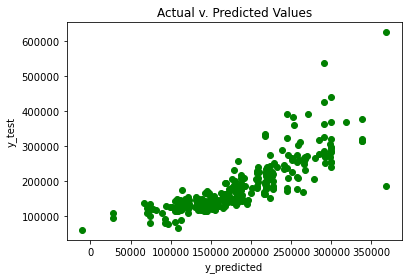

In [99]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
from scipy import stats

scaler = MinMaxScaler()
y = learning_model_df["SalePrice"]
X = scaler.fit_transform(learning_model_df.drop("SalePrice", axis=1))

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)
r2 = lin_reg.score(X_test, y_test)
print("R2:", r2)

y_predicted = lin_reg.predict(X_test)

plt.figure()
plt.scatter(y_predicted, y_test, color="green")
plt.title("Actual v. Predicted Values")
plt.xlabel("y_predicted")
plt.ylabel("y_test")
plt.show()

## Machine Learning: Decision Tree

Using the same parameters as the linear regression model, comparison of tests will be completed by constructing a decision tree learning model. Comparing accuracy will reveal which model is better, given the attributes to predict sales price.

Accuracy: 0.6370239933733158


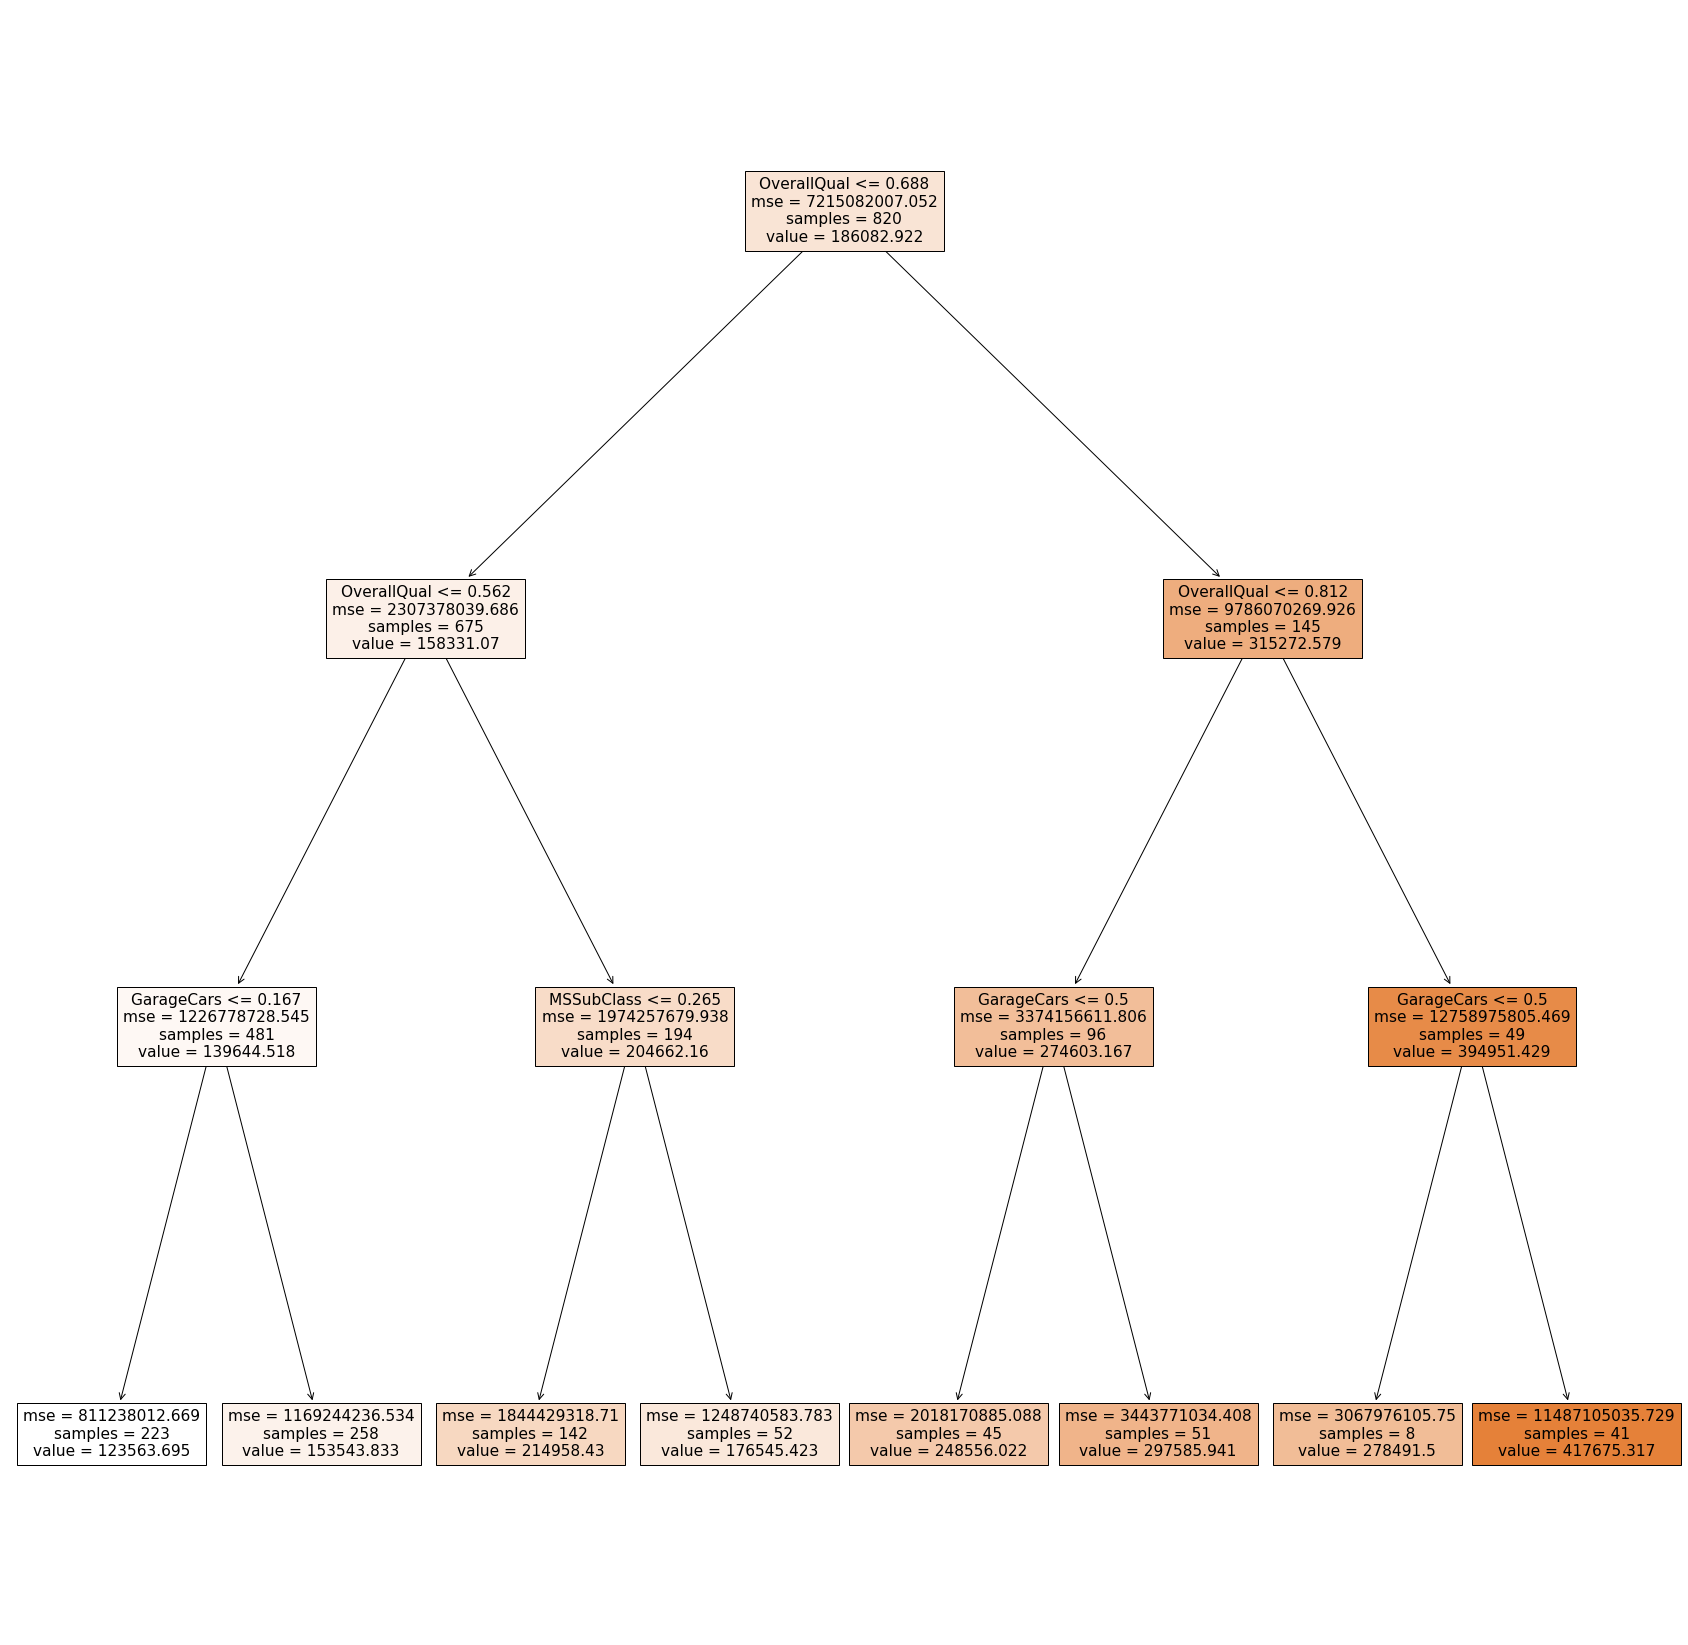

In [100]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.tree import plot_tree

scaler = MinMaxScaler()
y = learning_model_df["SalePrice"]
X = scaler.fit_transform(learning_model_df.drop("SalePrice", axis=1))

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

clf = DecisionTreeRegressor(random_state=0, max_depth=3)
clf.fit(X_train, y_train)
plt.figure(figsize=[30,30])

X_column = learning_model_df.drop("SalePrice", axis=1)
plot_tree(clf, feature_names=X_column.columns, filled=True)

accuracy = clf.score(X_test, y_test)
print("Accuracy:", accuracy)

Though similar accuracy scores were given, the linear regression model had a slightly better performance than the decision tree did.